# Trading options

<code>Code by: Prof. Carl Scheffler</code> 

You start with ¥ 10,000 and can buy as many of the following call options as you want.

* Strike price: ¥ 10,500
* Cost of 1 call option: ¥ 100

According to your pricing model the underlying stock will have
a price at the option expiry
date distributed according to Normal(¥ 10,600, (¥ 200)²).

Work through the tasks below to determine a good trading strategy so that you maximize your gains and limit your losses while trading these options.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [5]:
def calculate_money_at_option_expiry(money_at_start, options_purchased, price_per_option):
    '''
    Calculate how much money you have after buying some number of
    options with a strike price of $105, and waiting for them to
    expire. The value of the underlying stock at expiry is a sample
    from a normal distribution with mean 106 and standard deviation 2.

    Arguments:

        money_at_start (float) How much money you have before buying
          the options.

        options_purchased (int) How many options you purchase.

        price_per_option (float) The dollar price per option.

    Returns (float) the amount of money you have left after the
      options options expired, based on the random sample from the
      stock price.
    '''
    if options_purchased * price_per_option > money_at_start:
        raise ValueError('You tried to buy too many options')
    strike_price = 10500
    stock_price = np.random.normal(10600, 200)
    option_value_at_expiry = max(0, stock_price - strike_price)
    money_at_end = money_at_start + options_purchased * (
        option_value_at_expiry - price_per_option)
    return money_at_end

# Buy 1 option and see what happens
money_at_start = 10000
price_per_option = 100
options = 1
money_at_end = calculate_money_at_option_expiry(money_at_start, options, price_per_option)
print('Started with ¥ %.2f, bought 1 option, and ended up with ¥ %.2f.' % (money_at_start, money_at_end))

Started with ¥ 10000.00, bought 1 option, and ended up with ¥ 10712.00.


Mean: ¥ 10040.405295988676
Median: ¥ 10001.223413474057
95% interval of distribution: [¥ 9900.00, ¥ 10394.74]


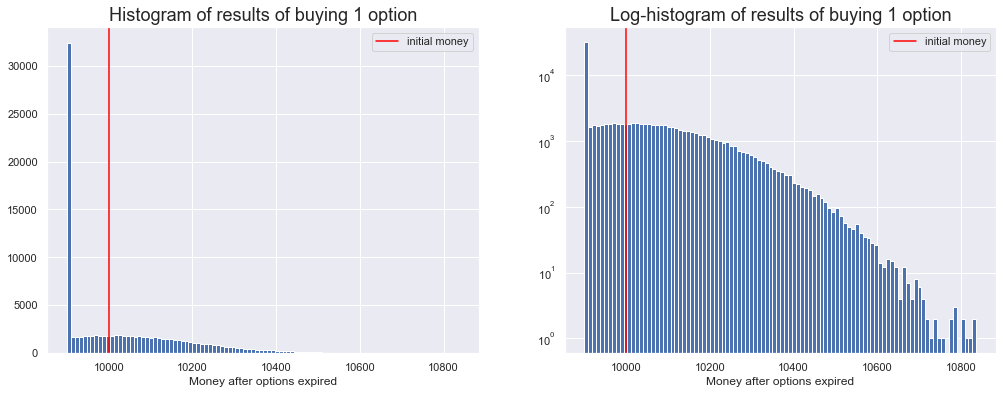

In [8]:
results = [calculate_money_at_option_expiry(10000, 1, 100) for _ in range(100000)]

print('Mean: ¥', np.mean(results))
print('Median: ¥', np.median(results))
print('95%% interval of distribution: [¥ %.2f, ¥ %.2f]' % tuple(np.percentile(results, [2.5, 97.5])))

plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
plt.hist(results, bins=100)
plt.axvline(10000, color='red', label='initial money')
plt.xlabel('Money after options expired')
plt.legend()
plt.title('Histogram of results of buying 1 option', fontsize=18)

plt.subplot(1, 2, 2)
plt.hist(results, bins=100, log=True)
plt.axvline(10000, color='red', label='initial money')
plt.xlabel('Money after options expired')
plt.legend()
plt.title('Log-histogram of results of buying 1 option', fontsize=18)

plt.show()

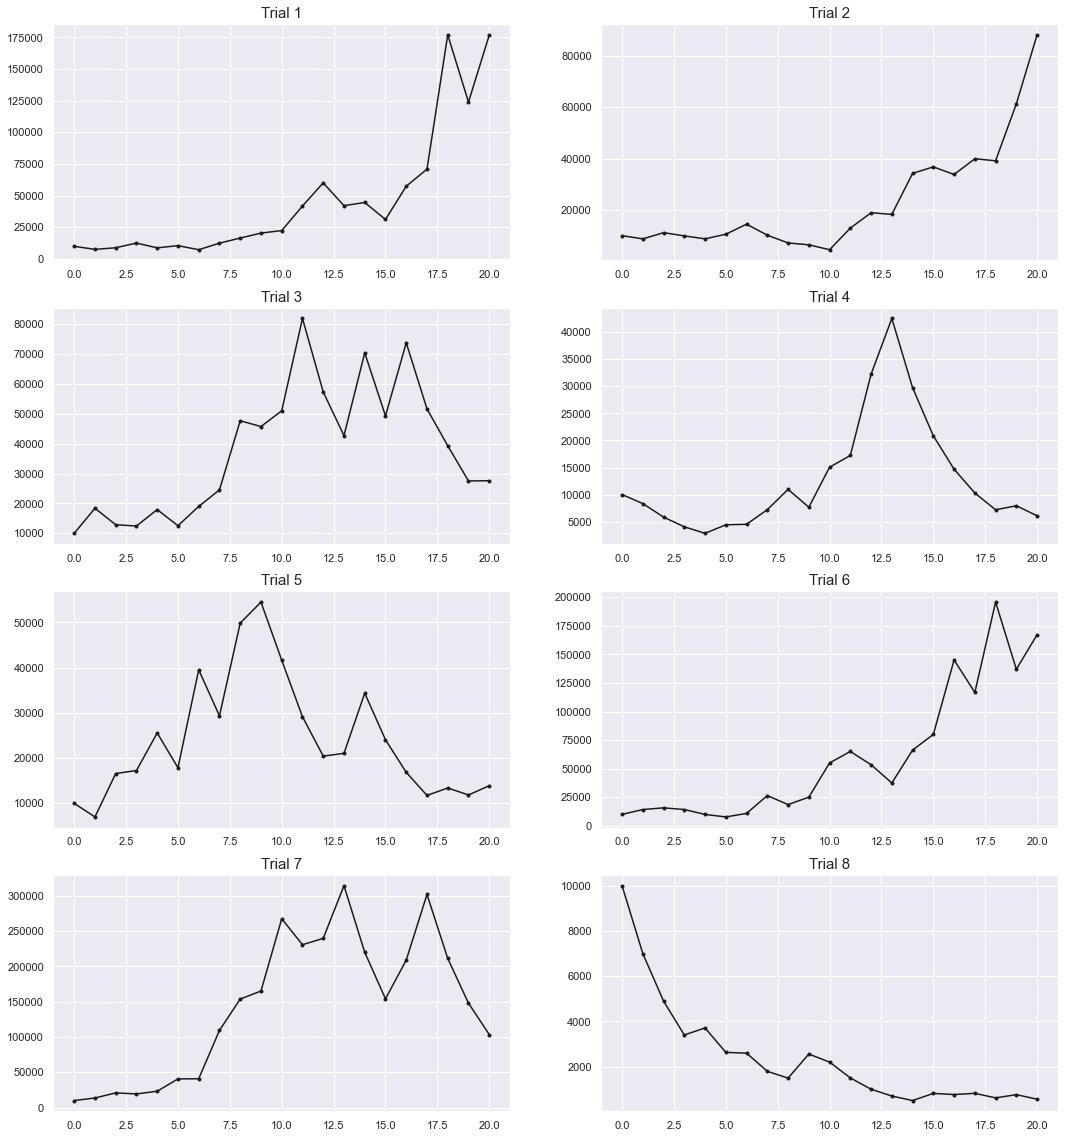

In [16]:
initial_money = 10000
trade_proportion = 0.3
max_trades = 20
price_per_option = 100

# Generate a few trading outcome
plt.figure(figsize=(18, 20))
for trial in range(8):
    money = [initial_money]
    for trade in range(max_trades):
        if money[-1] < price_per_option:
            # Stop if we don't have enough money left to buy any more options
            break
        options_to_buy = round(money[-1] * trade_proportion / price_per_option)
        money.append(calculate_money_at_option_expiry(money[-1], options_to_buy, price_per_option))
    plt.subplot(4, 2, trial+1)
    plt.plot(money, 'k.-')
    plt.title('Trial ' + str(trial + 1), fontsize=15)
plt.show()

Mean: ¥ 93835.2882728652
Median: ¥ 21848.75873796055
Risk of ruin: 0.00018
Risk of loss: 0.32027


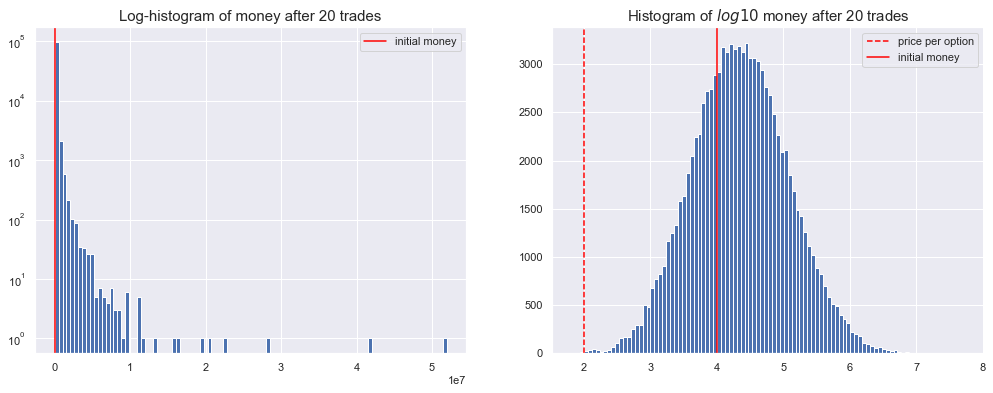

In [27]:
money_at_end = []
for _ in range(100000):
    money = initial_money
    for trade in range(max_trades):
        if money < price_per_option:
            # Stop if we don't have enough money left to buy any more options
            break
        options_to_buy = round(money * trade_proportion / price_per_option)
        money = calculate_money_at_option_expiry(money, options_to_buy, price_per_option)
    money_at_end.append(money)  # Record how much money we have left at the end
money_at_end = np.array(money_at_end)

print('Mean: ¥', money_at_end.mean())
print('Median: ¥', np.median(money_at_end))
print('Risk of ruin:', (money_at_end < price_per_option).mean())
print('Risk of loss:', (money_at_end < initial_money).mean())

plt.figure(figsize=(17, 6))
'''
plt.subplot(2, 2, 1)
plt.hist(money_at_end, bins=100)
plt.axvline(initial_money, color='red', label='initial money')
plt.legend()
plt.title(f'Histogram of money after {max_trades} trades')'''

plt.subplot(1, 2, 1)
plt.hist(money_at_end, bins=100, log=True)
plt.axvline(initial_money, color='red', label='initial money')
plt.legend()
plt.title(f'Log-histogram of money after {max_trades} trades', fontsize=15)

plt.subplot(1, 2, 2)
plt.hist(np.log10(money_at_end), bins=100)
plt.axvline(np.log10(price_per_option), color='red', linestyle='--', label='price per option')
plt.axvline(np.log10(initial_money), color='red', label='initial money')
plt.legend()
plt.title(f'Histogram of $log 10$ money after {max_trades} trades', fontsize=15)

plt.show()

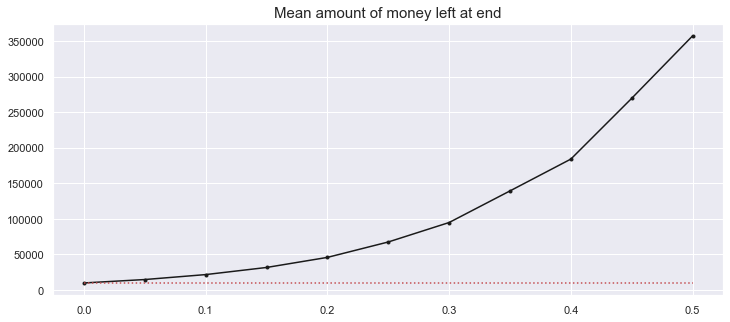

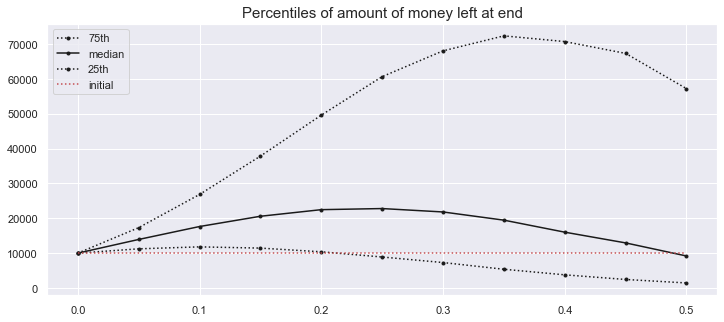

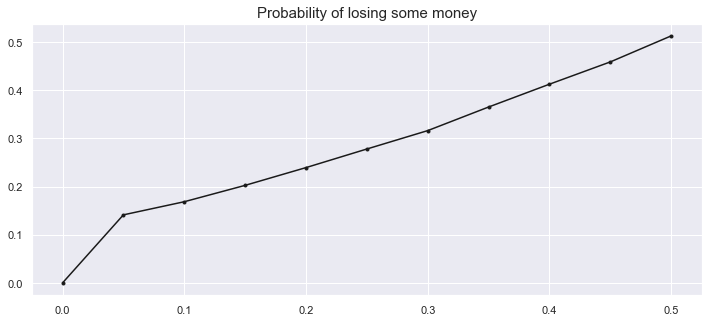

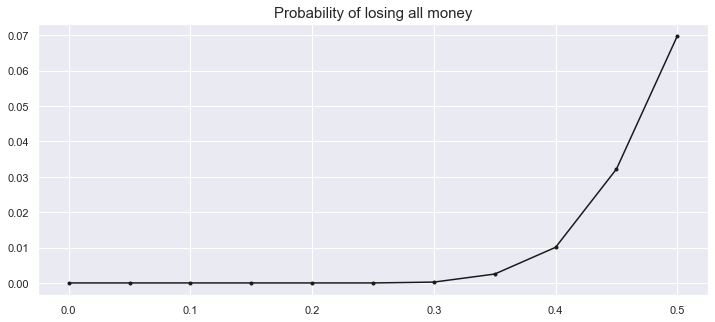

In [31]:
initial_money = 10000
max_trades = 20
price_per_option = 100

trade_proportions = np.linspace(0, 0.5, 11)
plot_data = {
    'mean': [],
    'p25': [],
    'p50': [],
    'p75': [],
    'risk_ruin': [],
    'risk_loss': []}
for trade_proportion in trade_proportions:
    money_at_end = []
    for _ in range(100000):
        money = initial_money
        for trade in range(max_trades):
            if money < price_per_option:
                # Stop if we don't have enough money left to buy any more options
                break
            options_to_buy = round(money * trade_proportion / price_per_option)
            money = calculate_money_at_option_expiry(money, options_to_buy, price_per_option)
        money_at_end.append(money)  # Record how much money we have left at the end
    money_at_end = np.array(money_at_end)

    plot_data['mean'].append(money_at_end.mean())
    plot_data['p25'].append(np.percentile(money_at_end, 25))
    plot_data['p50'].append(np.percentile(money_at_end, 50))
    plot_data['p75'].append(np.percentile(money_at_end, 75))
    plot_data['risk_ruin'].append((money_at_end < price_per_option).mean())
    plot_data['risk_loss'].append((money_at_end < initial_money).mean())

plt.figure(figsize=(12, 5))
plt.plot(trade_proportions, plot_data['mean'], 'k.-')
plt.title('Mean amount of money left at end', fontsize=15)
plt.plot(trade_proportions[[0, -1]], [initial_money, initial_money], 'r:', label='initial')

plt.figure(figsize=(12, 5))
plt.plot(trade_proportions, plot_data['p75'], 'k.:', label='75th')
plt.plot(trade_proportions, plot_data['p50'], 'k.-', label='median')
plt.plot(trade_proportions, plot_data['p25'], 'k.:', label='25th')
plt.plot(trade_proportions[[0, -1]], [initial_money, initial_money], 'r:', label='initial')
plt.title('Percentiles of amount of money left at end', fontsize=15)
plt.legend()

plt.figure(figsize=(12, 5))
plt.plot(trade_proportions, plot_data['risk_loss'], 'k.-')
plt.title('Probability of losing some money', fontsize=15)

plt.figure(figsize=(12, 5))
plt.plot(trade_proportions, plot_data['risk_ruin'], 'k.-')
plt.title('Probability of losing all money', fontsize=15)

plt.show()